# PARCIAL FÍSICA COMPUTACIONAL I

el problema consite en un sistema de dos pendulos que estan acoplados por un resorte de constante (k), igual longitud y masa.

<img src="pendulo.png">
simular las ecuaciones que generen el movimiento del sistema de péndulos. 

## solución



Para la solucion de este problema, se recurre a la dinamica lagrangina con el fin de encontrar la ecuaciones diferenciales que modelen el movimiento de este sistema.

por lo tanto:

\begin{equation}
\frac{\partial}{\partial t} \left(\frac{\partial L}{\partial q_i}\right)=\frac{\partial L}{\partial q_i}
\end{equation}

Utilizando la ecuación anterior y considerando que el movimiento se va a realizar para pequeñas oscilaciones($cos\theta=1;\,sen\theta=\theta$), podemos empezar consiguiendo la expresión para nuestro lagrangiano:

\begin{equation}
L=T-U
\end{equation}

si:
l= longitud de los péndulos.

m= masa de los péndulos.

$\theta$= ángulo de oscilación péndulo 1

$\varphi$= ángulo de oscilación péndulo 2

Para las posiciones tenemos:

\begin{equation*}
x_{1}=l\theta  \Rightarrow \, \dot{x_1}=l\dot{\theta}
\end{equation*}

\begin{equation}
x_{2}=l\varphi \Rightarrow \, \dot{x_2}=l\dot{\varphi}+l 
\end{equation}

\begin{equation}
 y_1=-l \Rightarrow\, \dot{y_1}=0
\end{equation}

\begin{equation}
y_2=-l \Rightarrow \, \dot{y_2}=0
\end{equation}

calculado las energías (cinética y potencial), tenemos:

\begin{equation}
T=\frac{1}{2}m\left( l^2\dot{\theta}^2\right)+\frac{1}{2}m\left( l^2\dot{\varphi}^2\right)
\end{equation}

\begin{equation}
U=\frac{mgl}{2}\left(\theta^2+\varphi^2\right)+\frac{kl^2}{2}\left(\theta-\varphi\right)^2
\end{equation}

por lo tanto el lagrangiano queda:

\begin{equation}
L=\frac{1}{2}m\left( l^2\dot{\theta}^2\right)+\frac{1}{2}m\left( l^2\dot{\varphi}^2\right)-\frac{mgl}{2}\theta^2-\frac{mgl}{2}\varphi^2-\frac{kl^2}{2}\left(\theta-\varphi\right)^2
\end{equation}

aplicando la ecuacion de euler lagrange para $\theta$:

\begin{equation}
\frac{\partial L}{\partial\theta}-\frac{d}{dt} \left(\frac{\partial L}{\partial \dot{\theta}}\right)=0
\end{equation}

\begin{equation}
\frac{\partial L}{\partial\theta}=-mgl\theta-kl^2(\theta-\varphi)
\end{equation}

\begin{equation}
\frac{\partial L}{\partial \dot{\theta}}=ml^2\dot{\theta} \, \Rightarrow \, \frac{d}{dt} \left(\frac{\partial L}{\partial \dot{\theta}}\right)=ml^2\ddot{\theta}
\end{equation}

\begin{equation}
\Rightarrow -mgl\theta-kl^2(\theta-\varphi)-ml^2\ddot{\theta}=0
\end{equation}

cancelando los negativos y reorganizando la primera ecuación diferencial nos queda:

\begin{equation}
\ddot{\theta}+\frac{g}{l}\theta+\frac{k}{m}(\theta-\varphi)=0
\end{equation}

aplicando la ecuación de Euler lagrange para $\varphi$:

\begin{equation}
\frac{\partial L}{\partial\varphi}-\frac{d}{dt} \left(\frac{\partial L}{\partial \dot{\varphi}}\right)=0
\end{equation}

\begin{equation}
\frac{\partial L}{\partial\varphi}=-mgl\varphi+kl^2(\theta-\varphi)
\end{equation}

\begin{equation}
\frac{\partial L}{\partial \dot{\varphi}}=ml^2\dot{\varphi} \, \Rightarrow \, \frac{d}{dt} \left(\frac{\partial L}{\partial \dot{\varphi}}\right) = ml^2\ddot{\varphi} 
\end{equation}

\begin{equation}
\Rightarrow mgl\varphi-kl^2(\theta-\varphi)+ml^2\ddot{\varphi} =0
\end{equation}

Reorganizando terminos con el fin de que $\ddot{\varphi}$ quede solo tenemos:

\begin{equation}
\ddot{\varphi}+\frac{y}{l}\varphi-\frac{k}{m}(\theta-\varphi)=0
\end{equation}

como  ya tenemos nuestra ecuaciones diferenciales, y son ecuaciones de segundo orden, debemos hacer una reducción de orden esto debido a que python solo soluciona ecuaciones de primer orden. Después de esto se procede a realizar el código para la simulación utilizando el método de odeint.



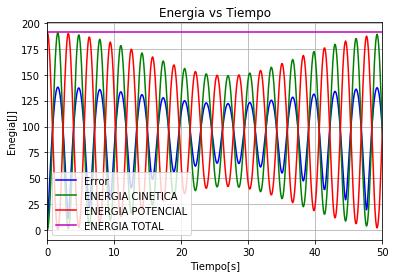

In [16]:
from numpy import array, linspace, shape,matrix,transpose
from math import sin, cos, pi,sqrt,atan
from scipy.integrate import odeint
import numpy as np
from vpython import  curve,box,cylinder,helix,sphere, scene, vector, color, arrow, text, sleep
import numpy as np
import matplotlib.pyplot as plt
from pylab import plot,legend,title,xlabel,ylabel


def solucion (f,t,g,l,k,m):
    df1=f[1]
    df2=-(g/l)*f[0]-(k/m)*(f[0]-f[2])
    df3=f[3]
    df4=-(g/l)*f[2]+(k/m)*(f[0]-f[2])
    return array([df1,df2,df3,df4])

l=10 #longitud del pendulo
k=3  #constante del resorte 
m=50 #masa de los pendulos 
g=9.8 #gravedad
thetaI=5*pi/180 #angulo inicial para el primer pendulo
thetaIp=0   # velocidad inicial del pendulo 1
phiI=15*pi/180 #angulo inicial para el pendulo 2
phiIp=0   #velocidad inicial para pendulo 2
tI=0 #tiempo inicial 
tf=100 # tiempo final 
n=1000 #numero de paso
t=linspace(tI,tf,n)
condINI=array([thetaI,thetaIp,phiI,phiIp])
sol=odeint(solucion,condINI,t,args=(g,l,k,m))
xp=l*thetaI
yp=-l
zp=0
r=1
ki=((1/2)*m*(l*thetaIp)**2)+(1/2)*m*(l*phiIp)**2 #energia cinetica inicial
ui=(m*g*l/2)*((thetaI**2)+(phiI**2))+((k*(l)**2)/2)*(thetaI-phiI)**2 #energia potencial inicial
KIV=ki*np.ones((n,1))#valor inicial de la energia cinetica
UIV=ui*np.ones((n,1))#valor inical de la energia potencial 
K=((m/2)*(l*sol[:,1])**2)+(m/2)*(l*sol[:,3])**2#energia cinetica
U=(m*g*l/2)*((sol[:,0]**2)+(sol[:,2]**2))+((k*(l)**2)/2)*(sol[:,0]-sol[:,2])**2#energia potencial
E=K+U#energia total
KdTe=(l**2)*(m*sol[:,1])#derivada parcial de la energia cinetica con respecto a theta punto
KdPhi=(l**2)*(m*sol[:,3])#derivada parcial de la energia cinetica con respecto a phi
UdTe=(k*(2*sol[:,0]-2*sol[:,2])*l**2)/2 + g*m*sol[:,0]*l#derivada parcial de la energia potencial con respecto a theta
UdPhi=g*l*m*sol[:,2]-(k*l**2*(2*sol[:,0]-2*sol[:,2]))/2#derivada parcial de la energia potencial con respecto a phi

Paso=(tf/n)
ERT=[]
for i in range (0,n):
    ERTHe=sqrt(((Paso*KdTe[i])**2)+((Paso*KdPhi[i])**2))
    ERT.append(ERTHe)
plt.plot(t,ERT,'b',label='Error')
#plt.plot(t,KIV,'r')
plt.plot(t,K,'g', label='ENERGIA CINETICA')
plt.xlim(0,20)
#lt.grid('on')
plt.plot(t,U,'r', label='ENERGIA POTENCIAL')
plt.plot(t,E,'m', label='ENERGIA TOTAL')
plt.grid('on')
#plt.plot(t,UIV,'b')
plt.xlim(0,50)
title('Energia vs Tiempo')
xlabel('Tiempo[s]')
ylabel('Enegia[J]')
legend(loc='lower left')


# analisis energetico 

El análisis energético de este sistema de péndulos, esta modelado por un  comportamiento cosenonoidal,donde se muestran picos de valores máximos y mínimos tanto para la energía cinética como para la potencial, cuando un valor de energía potencial es máximo (grafica color  rojo), el valor de la energía cinética se encuentra en un mínimo(grafica color verde),  el valor de la energía total se mantendrá prácticamente constante,Todo esto a groso modo. 

Ahora si hablamos deforma especifica de la energía potencial, debemos aclarar que la mayoría de la energía potencial de este sistema es aportada por la energía producida por el resorte, y una pequeña cantidad es producida por la gravitatoria, esto debido a la aproximación de pequeñas oscilaciones, lo que causa que el péndulo no realice movimientos muy relevantes en (y).

 por otra parte hablando de la energía cinética esta energía es la suma de la energía cinética del péndulo uno como del péndulo dos y en general dicha energía va a depender  de la velocidad en la que se encuentre oscilando los péndulos .

Si analizamos la grafica azul esta es la grafica del error de la energía cinética del sistema y este es  mostrado debido a que como estamos usando métodos de aproximación numéricas para la solución de las ecuaciones diferenciales, siendo este error el causante muchas veces de que las soluciones numéricas no coincidan con las teóricas.

La energía total del sistema (grafica magenta) tiende a ser contante debido a que esta es la suma de toda la energía del sistema, y si tenemos en cuenta que  la energía cinética y la total se complementan, los valores para la energía total siempre va ser constante.